### Imports

In [119]:
# Making imports convenient
import sys
import os
PATH=os.getcwd().split('/notebooks')[0]
sys.path.insert(1, PATH)

import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from src.inference.inference_utils import *

DATA_PATH =  PATH + '/data/Inference/'

### Load data

In [120]:
ctk = pd.read_csv(DATA_PATH + 'ctk.csv')
denik = pd.read_csv(DATA_PATH + 'denik.csv')
lidovky = pd.read_csv(DATA_PATH + 'lidovky.csv')
novinky = pd.read_csv(DATA_PATH + 'novinky.csv')
idnes = pd.read_csv(DATA_PATH + 'idnes.csv')

data = pd.concat([ctk,denik,lidovky,novinky,idnes])

In [69]:
sampled_domains = data.groupby('subdomain',as_index=False).apply(lambda x: x.sample(n=4000,random_state=10))

<AxesSubplot:xlabel='text_bias', ylabel='Density'>

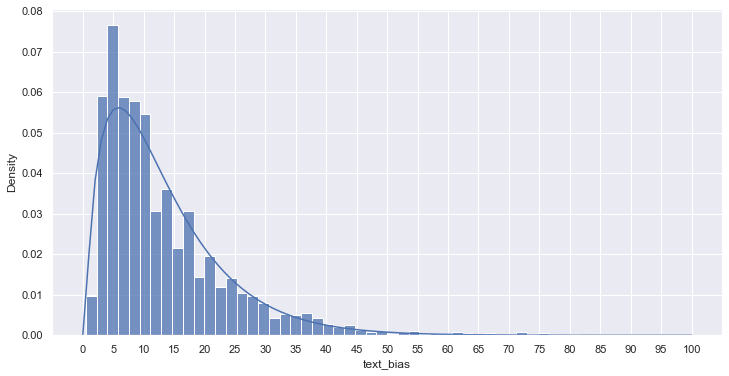

In [121]:
sampled = sampled_domains[sampled_domains['text_bias']>0]

data1 = sampled_domains[sampled_domains['subdomain']=='denik.cz']['text_bias']
data2 = sampled_domains[sampled_domains['subdomain']=='ceskenoviny.cz']['text_bias']


ax = plt.figure(figsize=(12,6))
plt.xticks(np.arange(0, 101, 5.0))
plt.yticks(np.arange(0,0.12, 0.01))
x = np.linspace(0, 100, 100)


#ČTK
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(data1)
y = stats.gamma.pdf(x,a=fit_alpha,loc=fit_loc,scale=fit_beta)
plt.plot(x, y)
sns.histplot(x=data1, stat="density")

#novinky
#fit_alpha2, fit_loc2, fit_beta2=stats.gamma.fit(data2)
#y2 = stats.gamma.pdf(x,a=fit_alpha2,loc=fit_loc2,scale=fit_beta2)
#plt.plot(x, y2)
#sns.histplot(x=data2, stat="density")


<AxesSubplot:xlabel='text_bias', ylabel='Density'>

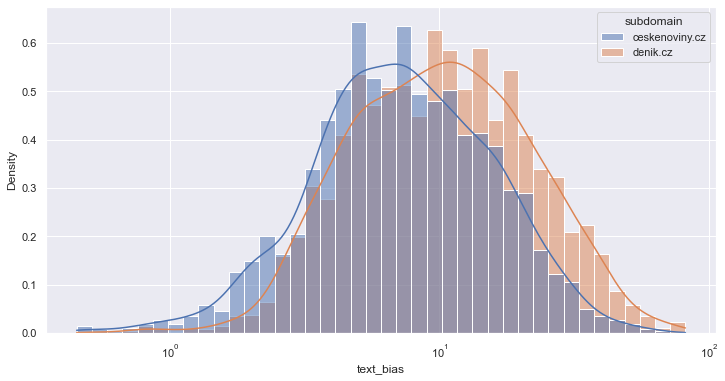

In [123]:
#ctk + denik
ax = plt.figure(figsize=(12,6))

ctk_denik=sampled_domains[(sampled_domains['subdomain']=='ceskenoviny.cz') | (sampled_domains['subdomain']=='denik.cz')]
sns.histplot(data=ctk_denik,x='text_bias',hue='subdomain',log_scale=True,stat='density',kde=True)


## Bias along domains

In [71]:
bias_along_domains = sampled_domains.groupby('subdomain',as_index=False).agg({'text_bias':'mean'}).sort_values(by='text_bias')

Text(0, 0.5, 'Average bias of the articles')

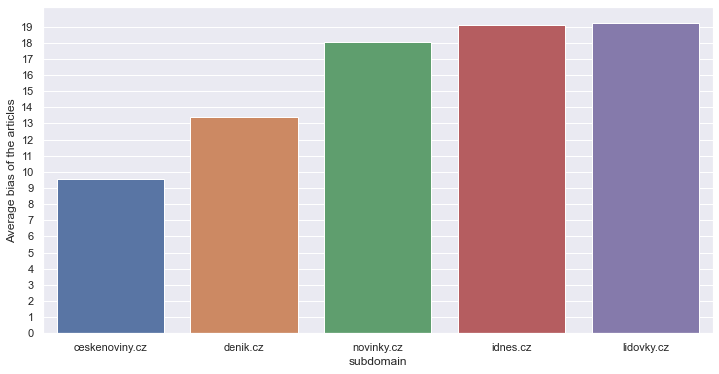

In [72]:
ax = plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,20, 1))
sns.barplot(x=bias_along_domains['subdomain'], y=bias_along_domains['text_bias'],ci=None)
plt.ylabel('Average bias of the articles')

In [73]:
sampled_domains.groupby('subdomain').agg({'text_bias':'mean'}).sort_values(by='text_bias')

,text_bias
subdomain,
ceskenoviny.cz,9.531645
denik.cz,13.376197
novinky.cz,18.048275
idnes.cz,19.089700
lidovky.cz,19.239604


## Bias along sections

In [85]:
small_sections_out = data[data['section'].groupby(data['section']).transform('size')>50]
small_sections_out.groupby('section')['section'].count().sort_values()

section
cestiny           58
ceskenoviny       59
komentare         62
atletika          70
hry               72
muzi              77
film              77
pr                79
tenis             92
vanoce            95
umeni            103
zdravi           163
hudba            170
xman             218
motorismus       236
kariera          366
rungo            388
regiony          434
zlin             489
usti             511
pardubice        511
relax            514
hokej            540
plnehry          618
hobby            621
plzen            635
vary             637
budejovice       642
liberec          650
olomouc          660
jihlava          674
hradec           723
sdeleni          782
koktejl          845
fotbal          1068
bonusweb        1073
ostrava         1136
revue           1215
technet         1217
zena            1303
brno            1396
ona             1421
finance         1466
praha           1469
auto            1537
mobil           1544
novinky         1709
bydle

In [94]:
section_biases = small_sections_out.groupby('section').agg({'text_bias':'mean'})['text_bias'].sort_values()

In [95]:
print(section_biases[:10])
print(section_biases[-10:])

section
kariera      3.603703
ekonomika    4.056578
zdravi       4.976201
byznys       5.433510
plzen        5.845502
olomouc      6.190911
finance      6.517701
praha        6.521680
krimi        6.821792
sdeleni      6.843331
Name: text_bias, dtype: float64
section
rungo        21.699309
umeni        21.905913
hudba        22.284284
revue        23.939246
xman         26.156186
bonusweb     28.139390
kultura      32.818075
film         33.497692
plnehry      46.705867
komentare    51.967878
Name: text_bias, dtype: float64


## Denik.cz

In [27]:
sampled = denik[(denik['Year']<2017) & (denik['section']=='denik')].groupby('Year',as_index=False).apply(lambda x: x.sample(n=350,random_state=42))

### In time

#### Years

Text(0.5, 0, 'Time')

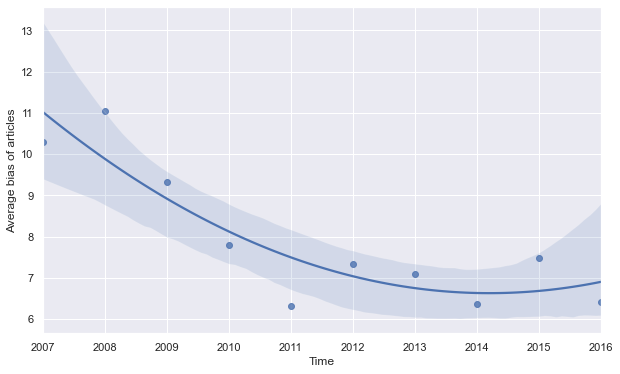

In [66]:
years_bias = sampled.groupby('Year',as_index=False).agg({'text_bias':'mean'})
sns.set_theme(color_codes=True)
ax = plt.figure(figsize=(10,6))
plt.xticks(np.arange(0,10),years_bias['Year'])
sns.regplot(x=np.arange(0,10),y='text_bias',data=years_bias,order=2)
plt.ylabel('Average bias of articles')
plt.xlabel('Time')

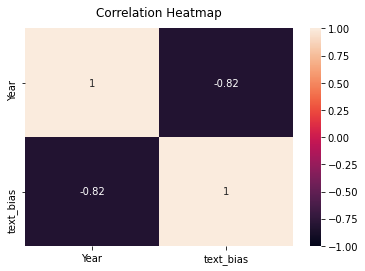

In [29]:
over_time_corr(sampled)

#### Months

In [30]:
months_bias = sampled.groupby('published',as_index=False).agg({'text_bias':'mean'})
all_years = months_bias['published'].apply(lambda x: str(x)[:4]).to_numpy()
indices = []
years = np.unique(all_years)
for y in years:
    indices.append(np.where(all_years==y)[0][0])

print(indices)
print(years)

[0, 10, 22, 34, 46, 58, 70, 82, 94, 106]
['2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016']


In [40]:
sampled[sampled['published']=='2008-02-01'].sort_values('text_bias')

quoting_ratio  text_bias  headline_bias  abstract_bias  \
1 12093      22.222222   0.000000              0            0.0   
  8545       36.842105   0.000000              0            0.0   
  757        16.666667   0.000000              0            0.0   
  10493       0.000000   0.000000              1            0.0   
  3369       41.666667   0.000000              0            0.0   
  5533       37.500000   4.166667              0           50.0   
  5842       15.000000  10.000000              1            0.0   
  7756       10.000000  10.000000              0          100.0   
  11174      29.545455  13.636364              0           50.0   
  9828        7.142857  14.285714              0            0.0   
  4815       19.444444  16.666667              0            0.0   
  5881       50.000000  16.666667              0           50.0   
  3699       31.818182  18.181818              0            0.0   
  12392      19.230769  19.230769              0            0.0   
  355        40.000000  20.000000              0            0.0   
  3569       18.918919  21.621622              0            0.0   
  2400       11.111111  22.222222              0            0.0   
  11599       7.407407  22.222222              1          100.0   
  8101       46.666667  26.666667              0            0.0   
  13469      26.923077  26.923077              0           50.0   
  4466       19.047619  38.095238              0            0.0   
  1494       25.000000  50.000000              0            0.0   
  9677        5.263158  52.631579              0           50.0   
  5636        5.555556  72.222222              0           50.0   
  282        13.333333  86.666667              1           50.0   

                                                  abstract  \
1 12093  Vymírající tmavé ovce ve Skotsku jsou evoluční...   
  8545   Armáda definitivně nakoupí obrněné transportér...   
  757    Porubě osobní vozidlo na vyznačeném přechodu p...   
  10493  Bez účasti českých reprezentantů pokračoval v ...   
  3369   Další pronásledování ujíždějícího vozu, při kt...   
  5533   Kontroverzní zákon umožňující cvičit lovecké p...   
  5842   V pátek se na Pražském hradě sejdou poslanci a...   
  7756   Videonahrávka, která se nyní objevila na strán...   
  11174  Kosovské hlavní město Priština i ostatní albán...   
  9828   Dvě brigády tureckého vojska čítající tisíce v...   
  4815   Úroveň života srovnatelná s dnešním Švédskem, ...   
  5881   Jeden expresní a tři osobní vlaky už letos zpo...   
  3699   Předseda lidovců Jiří Čunek věří, že by se vdo...   
  12392  Tragická smrt mladíka, ke které došlo vlistopa...   
  355    Datum pohřbu Američana, který byl ve středu 30...   
  3569   Prezidentské volby v Rusku se sice označují za...   
  2400   Písek/ Jakkoli se to může zdát podivné, jako s...   
  11599  Když Nicolas Sarkozy do prezidentského úřadu p...   
  8101   Kubánský vůdce Fidel Castro v úterý oznámil, ž...   
  13469  Ruští homosexuálové se dělí na dvě skupiny. Je...   
  4466   Jana Bobošíková, třetí kandidát na úřad prezid...   
  1494   Premiér republiky Mirek Topolánek po šedesáti ...   
  9677   Lukáš je ve věku, kdy okolní svět zkoumá ústy....   
  5636   Když se naposledy na Pražském hradě volil pres...   
  282    Ve vysokých funkcích se pohybuje řada lidí, se...   

                                                  headline  length  published  \
1 12093        Ubývá tmavých ovcí. Platí Darwinova teorie?   18716 2008-02-01   
  8545   Armáda definitivně nakoupí Pandury, dostane ji...   19987 2008-02-01   
  757    Řidič, který na přechodu zabil dívku, se sám udal   19368 2008-02-01   
  10493               V Japonsku nejlepší opět Morgenstern   18090 2008-02-01   
  3369    Prchající nezletilce zastavil až varovný výstřel   18262 2008-02-01   
  5533      Prezident vetoval zákon umožňující týrat lišky   19253 2008-02-01   
  5842                 Volba prezidenta: Atmosféra houstne   19271 2008-02-01   
  775

Text(0.5, 0, 'Time')

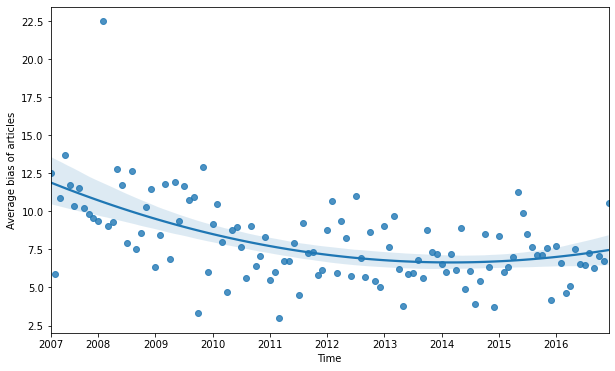

In [31]:
ax = plt.figure(figsize=(10,6))
#plt.yticks(np.arange(0,0.12, 0.01))
plt.xticks(indices,years, rotation='horizontal')
sns.regplot(x=np.arange(0,118),y='text_bias',data=months_bias,order=2)
plt.ylabel('Average bias of articles')
plt.xlabel('Time')


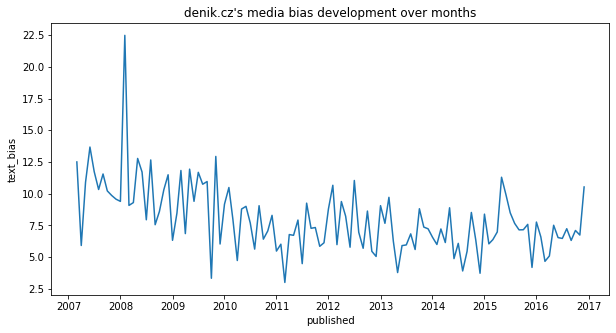

In [32]:
plot_in_time(sampled,'months')

#### Correlations

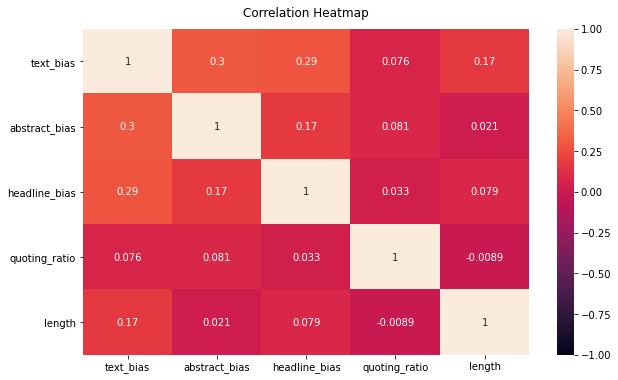

In [14]:
plot_corr(sampled)